In [1]:
import pandas as pd
import numpy as np
import scipy
from MakeFrameNumeric import MakeFrameNumeric
from TrainPredict import TrainPredict
from xgboost import plot_tree, plot_importance, Booster


In [2]:
## Create simple dataframe
data = { 'country': ['Germany','Germany','Germany','Germany','Germany', 'Germany', 'Germany', 
                     'UK', 'UK', 'UK',
                     'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US'],
         'float' : [0.12, 0.13, 0.131, 0.12, 0.1253, 0.123, 0.133,  # low numbers
                    3.129, 3.121, 3.133,  # v high numbers
                    1.32, 1.324, 1.323, 1.31, 1.3,    1.345, 1.312, 1.333, 1.342, 0.123],
          'rand' : [ np.random.uniform(100,200) for _ in range(20) ]} # higher numbers
print(data)

{'country': ['Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'UK', 'UK', 'UK', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US'], 'float': [0.12, 0.13, 0.131, 0.12, 0.1253, 0.123, 0.133, 3.129, 3.121, 3.133, 1.32, 1.324, 1.323, 1.31, 1.3, 1.345, 1.312, 1.333, 1.342, 0.123], 'rand': [181.04801924875719, 198.34783381501552, 152.160030300583, 110.89457537459464, 149.7303766801383, 132.3687889418164, 150.50850673006974, 105.00050019157241, 114.80691243883048, 171.0629985341493, 183.24932659985262, 180.3718118073587, 166.82331510783192, 155.12593561865404, 162.64470461825482, 122.07231764550092, 126.87974850245374, 137.38375289861162, 153.6340668044612, 197.2918980073746]}


In [3]:
frame = pd.DataFrame(data)
print(frame)

    country   float        rand
0   Germany  0.1200  181.048019
1   Germany  0.1300  198.347834
2   Germany  0.1310  152.160030
3   Germany  0.1200  110.894575
4   Germany  0.1253  149.730377
5   Germany  0.1230  132.368789
6   Germany  0.1330  150.508507
7        UK  3.1290  105.000500
8        UK  3.1210  114.806912
9        UK  3.1330  171.062999
10       US  1.3200  183.249327
11       US  1.3240  180.371812
12       US  1.3230  166.823315
13       US  1.3100  155.125936
14       US  1.3000  162.644705
15       US  1.3450  122.072318
16       US  1.3120  126.879749
17       US  1.3330  137.383753
18       US  1.3420  153.634067
19       US  0.1230  197.291898


In [4]:
#frame = frame.sample(frac=1).reset_index(drop=True)
#print(frame)

In [5]:
tp = TrainPredict()


In [6]:
print(tp.PrintErrors(frame))

column country_0: created binary classifier
column country_1: created binary classifier
column country_2: created binary classifier
column float: created regressor
column rand: created regressor
building model for column country_0 type onehot
building model for column country_1 type onehot


C:\Users\will\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


building model for column country_2 type onehot
building model for column float type raw
building model for column rand type raw
building model for column country_0 type onehot
building model for column country_1 type onehot
building model for column country_2 type onehot
building model for column float type raw
building model for column rand type raw
building model for column country_0 type onehot
building model for column country_1 type onehot
building model for column country_2 type onehot
building model for column float type raw
building model for column rand type raw
building model for column country_0 type onehot
building model for column country_1 type onehot
building model for column country_2 type onehot
building model for column float type raw
building model for column rand type raw
building model for column country_0 type onehot
building model for column country_1 type onehot
building model for column country_2 type onehot
building model for column float type raw
building mo

In [7]:
print(tp.predictedmeans)

    country_0  country_1  country_2     float        rand
0         0.9        0.0        0.0  0.123275  152.986385
1         0.9        0.0        0.0  0.124452  193.727008
2         1.0        0.0        0.0  0.131815  166.015451
3         1.0        0.0        0.0  0.123742  152.986385
4         1.0        0.0        0.0  0.127438  146.258887
5         1.0        0.0        0.0  0.125126  137.956010
6         1.0        0.0        0.0  0.130047  155.293541
7         0.0        0.4        0.5  3.127147  105.001737
8         0.0        0.4        0.5  3.123573  113.825402
9         0.0        0.0        0.9  3.130293  157.849723
10        0.0        0.0        1.0  1.311287  179.674939
11        0.0        0.0        1.0  1.322214  180.658018
12        0.0        0.0        1.0  1.318307  171.175993
13        0.0        0.0        1.0  1.322493  160.750211
14        0.0        0.0        1.0  1.305985  165.260825
15        0.0        0.4        0.5  1.337090  129.916747
16        0.0 

[0.43248758 0.5305186  0.         0.03699379]
Most useful columns to predict float were ['country_0', 'country_1']
Most useful columns to predict country_0 were ['float']


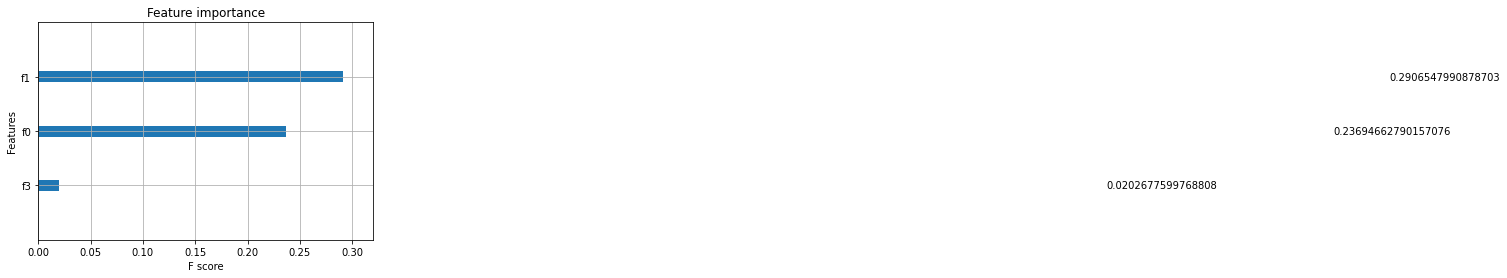

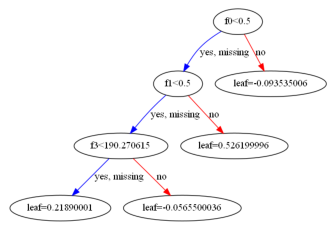

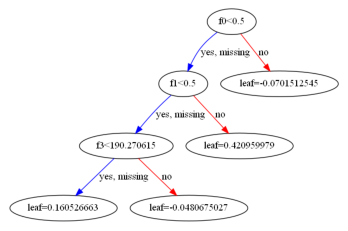

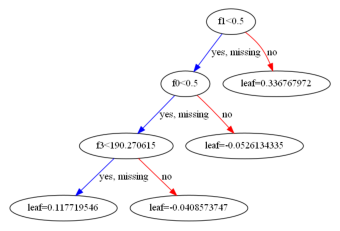

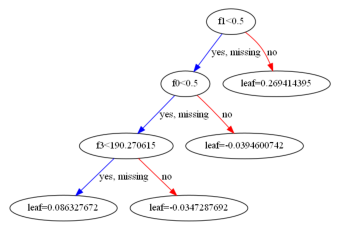

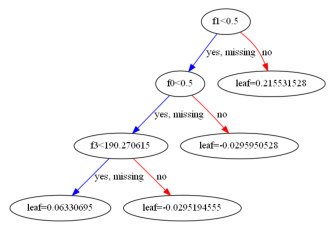

In [8]:
model = tp.models['float'][0]
print(model.feature_importances_)
plot_importance(model, importance_type='gain')
for i in range(5):
    plot_tree(model, num_trees=i)

tp.GetBestColumnsToPredict('float')
tp.GetBestColumnsToPredict('country_0')